#### ASTR 3890 - Selected Topics: Data Science for Large Astronomical Surveys (Spring 2022)
***N. Hernitschek***
___

# Homework 4
### Due: Monday, Feb 21th at 11.00am CST

The completed lecture notebook must also be submitted by 11:00am Central Time on Feb 21th.

---

## Problem 1

Let $\mu$ be a real number. Let $\sigma$ be a strictly positive real number.

Show that for a Gaussian distribution $\mathscr{N}(\mu,\sigma)$, the mode is its mean $\mu$.

Either write your solution as Markdown/Latex below, or paste in a scanned image of your handwritten solution.

### Solution

The probability density fuction for a Gaussian distribution is given by:

$$p(x|\mu,\sigma) = \frac{1}{\sigma\sqrt{2\pi}} \exp\left(\frac{-(x-\mu)^2}{2\sigma^2}\right)$$

The pdf is a bell curve where the highest point represents the value of highest probability. In other words, this value has the greatest frequency in the dataset, making it the mode. We can find this mode by determining the value of x that maximizes the output of the above equation.

$\frac{1}{\sigma\sqrt{2\pi}}$ is a positive constant. The exponential (exp) function is strictly increasing, so to maximize the entire equation, I need to maximize $\frac{-(x-\mu)^2}{2\sigma^2}$. 

I know that the numerator will always be negative or 0 because it is taking the negative of a square. The denominator will always be positive because it is a square. Thus, my result will be negative or 0. To maximize, $\frac{-(x-\mu)^2}{2\sigma^2}$ should be equal to 0.

The only case in which this can happen is when the numerator is equal to 0. In other words, x must be equal to $\mu$.

The pdf is at its maximum when x is equal to the mean, and this maximum value is also the value of greatest freqency. Knowing this, I can conclude that for a Gaussian distribution $\mathscr{N}(\mu,\sigma)$, the mode is equal to the mean.

## Problem 2

This question is about IQ. It's a flawed and questionable metric, but useful for this problem. By definition, IQ is calibrated as a Gaussian distribution with $\mu=100$ and $\sigma=15$. 

1) Create a `scipy.stats` Gaussian object with the given $\mu$ and $\sigma$. a) Plot the distribution, b) give 10 random draws, along with the pdf at each of the draws. 

2) Access the `cdf` property of the Gaussian object and plot it over the same $x$-range as in (1) but in a different figure. Access the `ppf` property (percent point function) and use *inverse transform sampling* of the cdf to draw $10^4$ random samples, and make a histogram of these. Overplot the pdf from (1). These should match.

3) What fraction of people have IQ > 130? *Hint: investigate all the properties of the Gaussian object from (1) to find the relevant property that gives you this, or perform a calculation involving the cdf.*

4) What IQ corresponds to "one in a million"?



### Solution



### 1.

In [2]:
import scipy.stats
from scipy.stats import norm
import numpy as np
from matplotlib import pyplot as plt
%matplotlib inline
%config InlineBackend.figure_format='retina'
from astropy.visualization.hist import hist as fancyhist

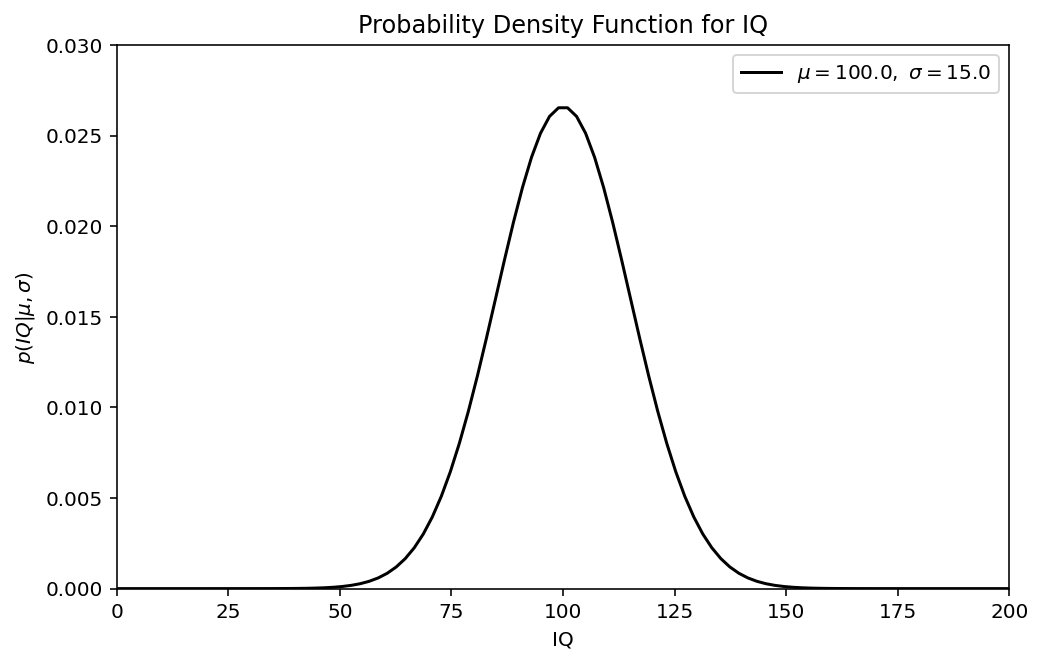

In [3]:
# Create a Gaussian object for IQ with mean = 100 and stdev = 15.
distIQ = scipy.stats.norm(100, 15)

# Get mean and stdev for plot legend.
mu = distIQ.mean()
sigma = distIQ.std()

# Plot the distribution.
xgrid = np.linspace(0, 200, 100) # generate distribution for a uniform grid of x values
gaussPDF = distIQ.pdf(xgrid)  # this is a function of xgrid

fig, ax = plt.subplots(figsize=(8, 5))

plt.plot(xgrid, gaussPDF, c='black', label=f'$\mu={mu},\ \sigma={sigma}$')
plt.xlim(0, 200)
plt.ylim(0, 0.03)
plt.xlabel('IQ')
plt.ylabel(r'$p(IQ|\mu,\sigma)$')
plt.title('Probability Density Function for IQ')
plt.legend()
plt.show()

In [4]:
# Get 10 random draws
draws = distIQ.rvs(size=10)

for item in draws:
    print(f'Random draw: {item}\nPDF at draw: {distIQ.pdf(item)}\n')

Random draw: 98.2719274885176
PDF at draw: 0.02642024223766796

Random draw: 83.39139910347353
PDF at draw: 0.014407894271942352

Random draw: 98.31783359300712
PDF at draw: 0.02642943519140004

Random draw: 92.27362053840879
PDF at draw: 0.02329192371782455

Random draw: 97.49481508090288
PDF at draw: 0.026227801807081865

Random draw: 97.84929315963917
PDF at draw: 0.026324171014330645

Random draw: 98.8483516701825
PDF at draw: 0.026517880066231615

Random draw: 89.77319029653867
PDF at draw: 0.021080523855757823

Random draw: 87.67957802597567
PDF at draw: 0.01898120381532066

Random draw: 107.4683952387517
PDF at draw: 0.02349570919485229



### 2.

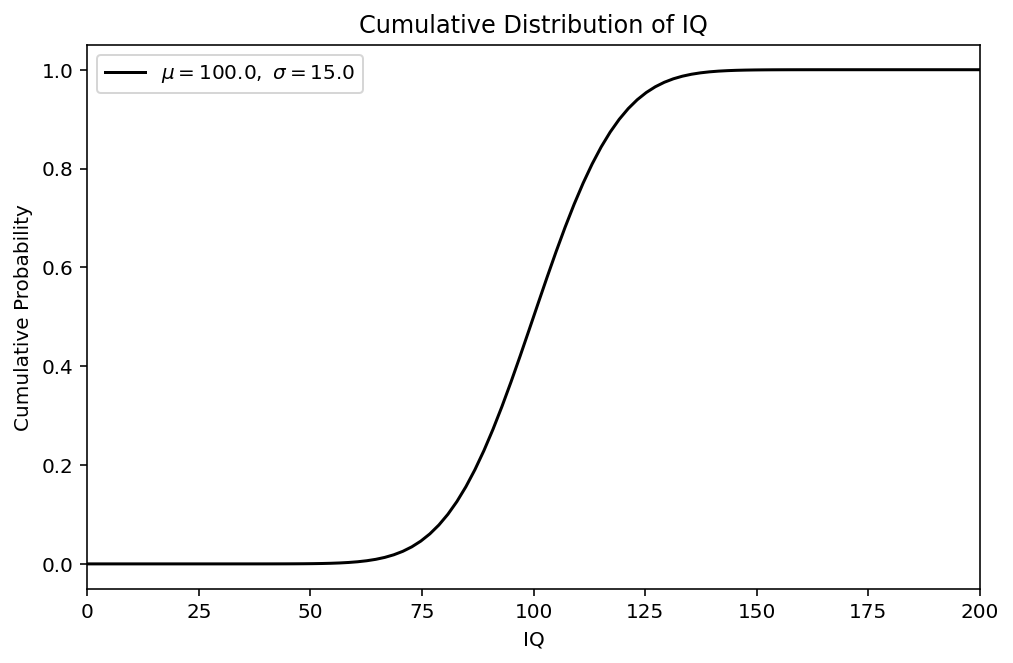

In [5]:
# Plot the cdf over the range [0, 200].

# Plot the distribution.
gaussCDF = distIQ.cdf(xgrid)  # this is a function of xgrid

fig, ax = plt.subplots(figsize=(8, 5))

plt.plot(xgrid, gaussCDF, c='black', label=f'$\mu={mu},\ \sigma={sigma}$')
plt.xlim(0, 200)
plt.xlabel('IQ')
plt.ylabel('Cumulative Probability')
plt.title('Cumulative Distribution of IQ')
plt.legend()
plt.show()

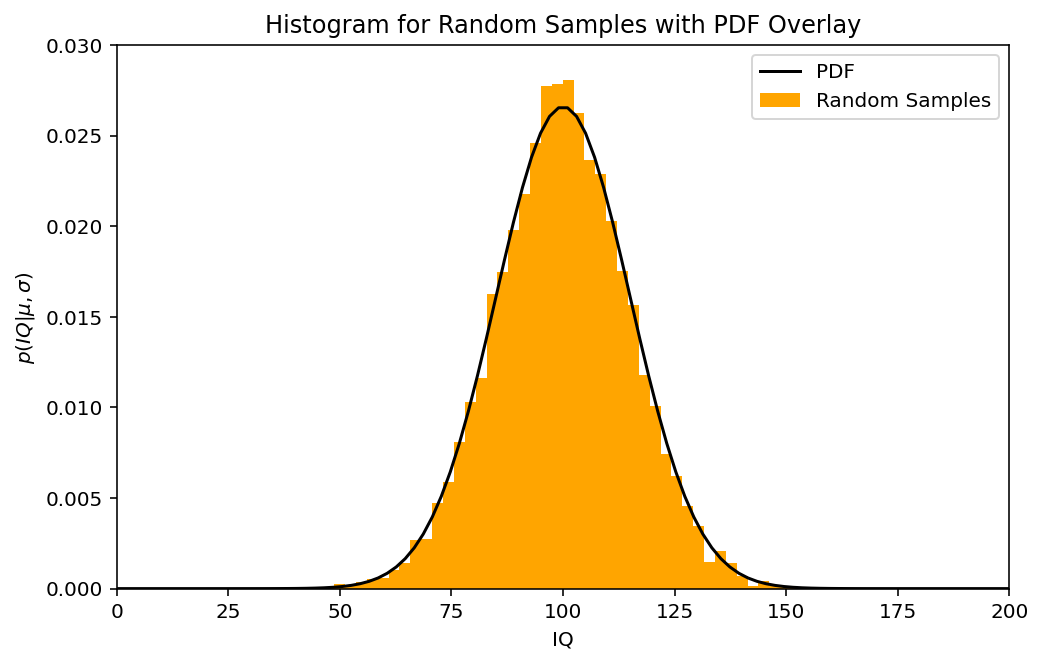

In [6]:
# Get 10,000 random values between 0 and 1.
N = 10000
rand_cdf = np.random.uniform(0, 1, N)

# Use inverse transform sampling to draw 10,000 random samples.
samples = [distIQ.ppf(i) for i in rand_cdf]

# Get bins for histogram using Scott's rule.
binsize = 3.5 * sigma / (N ** (1/3))
binsIQ = np.append(np.arange(0, 200, step=binsize), 200)

# Make a histogram for random samples. Plot over the probability density function.
fig, ax = plt.subplots(figsize=(8, 5))

plt.plot(xgrid, gaussPDF, c='black', label='PDF')
plt.hist(samples, bins=binsIQ, density=True, color='orange', label='Random Samples')
plt.xlim(0, 200)
plt.ylim(0, 0.03)
plt.xlabel('IQ')
plt.ylabel(r'$p(IQ|\mu,\sigma)$')
plt.title('Histogram for Random Samples with PDF Overlay')
plt.legend()
plt.show()

### 3.

In [12]:
# The cdf (cumulative distribution function) gives the probability that a person has an IQ less than or equal to a 
# given number.
# The fraction of people that have an IQ > 130 is the same as the probability that any given person has an IQ > 130.
# To find this, I can determine the fraction of people that have IQ <= 130 and subtract that fraction from 1. 

print(f'The fraction of people that have an IQ over 130 is {1 - distIQ.cdf(130):.6f}.')

The fraction of people that have an IQ over 130 is 0.022750.


### 4.

In [19]:
# Find percentile. Use 999,999 (1,000,000 - 1) to find the percent of distribution that this IQ needs to surpass.
percentile = 999_999/1_000_000

# Use ppf function to find the value corresponding to the percentile
print(f'The IQ that corresponds to "one in a million" is {distIQ.ppf(percentile):.2f}.')

The IQ that corresponds to "one in a million" is 171.30.
